In [1]:
# For data
import pandas as pd
import numpy as np

In [2]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [4]:
# General
from collections import Counter 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")
%config IPCompleter.greedy=True

In [23]:
# A little bit of analysis of the data we gathered...

In [5]:
df = pd.read_pickle('data.pkl').set_index('Ticker')
df.head()

,Fiscal Year,Report Date,Yield until 2018,Sector,Ten Baggers,PreTaxEarnToRev,PE,P/(E+D),P/(E+C),P/OperCash,D/E,CashToCurrDebt,LongDebtToEq
Ticker,,,,,,,,,,,,,
A,2008,2008-10-31,3.222060,Healthcare,False,0.141150,7.944518,6.755277,2.453454,7.282475,1.738179,1.074436,0.558421
AA,2015,2015-12-31,0.126271,Basic Materials,False,0.057684,-4.977057,6.648917,3.570408,4.908800,0.425606,0.231697,0.048380
AAL,2009,2009-12-31,5.882598,Industrials,False,-0.087965,-0.919481,-0.770433,0.509935,1.451396,-8.290914,0.575936,-1.260820
AAN,2009,2009-12-31,1.815018,Industrials,False,0.100662,10.802788,6.717202,4.251320,6.280033,0.489367,0.321700,0.123622
AAON,2010,2010-12-31,3.429207,Industrials,False,0.133387,20.403855,10.690198,10.031258,13.894066,0.372952,0.328671,0.102048


In [6]:
df = df.rename(columns={'P/(E+D)':'D/(E+Div)'})

In [7]:
df.describe()

,Fiscal Year,Yield until 2018,PreTaxEarnToRev,PE,D/(E+Div),P/(E+C),P/OperCash,D/E,CashToCurrDebt,LongDebtToEq
count,1286.000000,1286.000000,1259.000000,1276.000000,1277.000000,1277.000000,1276.000000,1284.000000,1285.000000,1284.000000
mean,2010.186625,3.962073,-3.041651,1.899813,-25.086038,-72.177547,3.458668,-2.647378,1.473557,-0.123709
std,2.163225,62.989169,62.597301,2031.288002,1706.783557,2590.722691,5258.292429,87.815820,3.200414,11.732252
min,2007.000000,-0.999747,-1723.774194,-53299.122420,-51941.055625,-68709.900156,-149308.454186,-2556.419643,0.000000,-380.276786
25%,2009.000000,0.000000,0.018967,-0.492612,2.346890,2.351393,3.121512,0.367527,0.170607,0.074235
50%,2010.000000,1.180819,0.078882,10.722941,6.653270,4.165114,6.931638,0.852083,0.562388,0.238817
75%,2010.000000,2.922846,0.154176,20.237249,12.628867,7.177631,12.707863,1.689350,1.435604,0.527390
max,2018.000000,2242.964807,0.876119,23287.123947,10212.230835,10219.116353,110911.493218,177.730612,52.695820,24.856572


In [8]:
df = df.drop(df['Yield until 2018'].nlargest(2).index) # drop the two highest values
df = df.drop(df['Yield until 2018'].nsmallest(2).index) # drop the two lowes values
df.describe()

,Fiscal Year,Yield until 2018,PreTaxEarnToRev,PE,D/(E+Div),P/(E+C),P/OperCash,D/E,CashToCurrDebt,LongDebtToEq
count,1282.000000,1282.000000,1257.000000,1272.000000,1273.000000,1273.000000,1272.000000,1280.000000,1281.000000,1280.000000
mean,2010.187207,2.026108,-3.046438,2.448408,-24.623339,-73.108173,4.168278,-2.681376,1.471110,-0.128804
std,2.166574,3.589162,62.647004,2034.388088,1709.363601,2594.646528,5266.501681,87.946673,3.200237,11.749648
min,2007.000000,-0.998667,-1723.774194,-53299.122420,-51941.055625,-68709.900156,-149308.454186,-2556.419643,0.000000,-380.276786
25%,2009.000000,0.000000,0.019001,-0.431226,2.416212,2.361885,3.129749,0.370819,0.170607,0.074235
50%,2010.000000,1.180819,0.079490,10.758676,6.661575,4.176638,6.957798,0.853801,0.562388,0.238817
75%,2010.000000,2.904195,0.154304,20.261463,12.634173,7.177631,12.719013,1.689350,1.435604,0.526858
max,2018.000000,64.374045,0.876119,23287.123947,10212.230835,10219.116353,110911.493218,177.730612,52.695820,24.856572


<AxesSubplot:xlabel='Yield until 2018'>

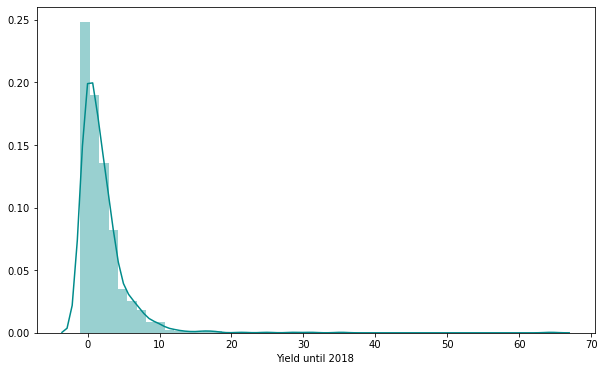

In [9]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df['Yield until 2018'], color='darkcyan')

In [10]:
# The majority of returns are up to 400%. Less than 5% reach a high return - above 500%.

In [11]:
df.isnull().sum()

Fiscal Year          0
Report Date          0
Yield until 2018     0
Sector               0
Ten Baggers          0
PreTaxEarnToRev     25
PE                  10
D/(E+Div)            9
P/(E+C)              9
P/OperCash          10
D/E                  2
CashToCurrDebt       1
LongDebtToEq         2
dtype: int64

In [12]:
df = df.dropna()
df = df[df['Sector'] != 'Null']
df.isnull().sum()

Fiscal Year         0
Report Date         0
Yield until 2018    0
Sector              0
Ten Baggers         0
PreTaxEarnToRev     0
PE                  0
D/(E+Div)           0
P/(E+C)             0
P/OperCash          0
D/E                 0
CashToCurrDebt      0
LongDebtToEq        0
dtype: int64

Text(0.5, 1.0, 'Yield until 2018')

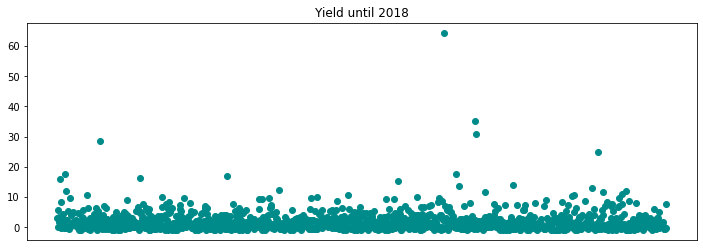

In [13]:
fig = plt.figure(figsize=(12,4))
plt.scatter(x=df.index, y=df['Yield until 2018'], color='darkcyan')
plt.xticks([], [])
plt.title('Yield until 2018')

In [14]:
df['Ten Baggers'].value_counts()

False    1162
True       25
Name: Ten Baggers, dtype: int64

Text(0.5, 1.0, 'Distribution Of Data By Ten Baggers :')

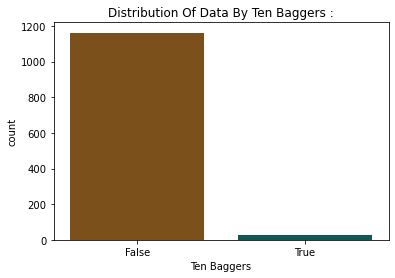

In [15]:
fig = plt.figure(figsize = (6,4))
sns.countplot(x='Ten Baggers', data=df, palette=['#8c510a','#01665e'])
plt.title('Distribution Of Data By Ten Baggers :')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1187 entries, A to ZYXI
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fiscal Year       1187 non-null   int64         
 1   Report Date       1187 non-null   datetime64[ns]
 2   Yield until 2018  1187 non-null   float64       
 3   Sector            1187 non-null   object        
 4   Ten Baggers       1187 non-null   bool          
 5   PreTaxEarnToRev   1187 non-null   float64       
 6   PE                1187 non-null   float64       
 7   D/(E+Div)         1187 non-null   float64       
 8   P/(E+C)           1187 non-null   float64       
 9   P/OperCash        1187 non-null   float64       
 10  D/E               1187 non-null   float64       
 11  CashToCurrDebt    1187 non-null   float64       
 12  LongDebtToEq      1187 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 161.7+

In [17]:
numData = df.drop(['Report Date','Fiscal Year', 'Sector'], axis=1)
numData.head()

,Yield until 2018,Ten Baggers,PreTaxEarnToRev,PE,D/(E+Div),P/(E+C),P/OperCash,D/E,CashToCurrDebt,LongDebtToEq
Ticker,,,,,,,,,,
A,3.222060,False,0.141150,7.944518,6.755277,2.453454,7.282475,1.738179,1.074436,0.558421
AA,0.126271,False,0.057684,-4.977057,6.648917,3.570408,4.908800,0.425606,0.231697,0.048380
AAL,5.882598,False,-0.087965,-0.919481,-0.770433,0.509935,1.451396,-8.290914,0.575936,-1.260820
AAN,1.815018,False,0.100662,10.802788,6.717202,4.251320,6.280033,0.489367,0.321700,0.123622
AAON,3.429207,False,0.133387,20.403855,10.690198,10.031258,13.894066,0.372952,0.328671,0.102048


Text(0.5, 1.0, 'Correlation Plot')

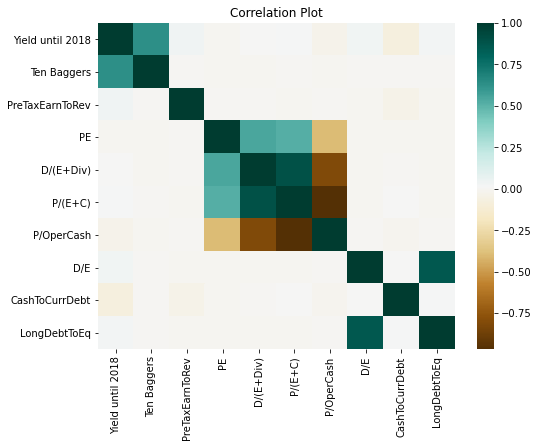

In [18]:
fig = plt.figure(figsize=(8,6))
corr = numData.corr()
sns.heatmap(corr, cmap="BrBG")
plt.title('Correlation Plot')

In [19]:
# Obviously, the 'Ten Baggers' values and the 'yield until 2018' values are correlated.That's not interesting. 
# Other parameters also correlate between them. 
# The correlation plot doesn't present any interesting insight...

In [20]:
sector = df[['Sector', 'Yield until 2018']].groupby('Sector').quantile(0.8)
sector = sector.sort_values('Yield until 2018', ascending=False)
sector

,Yield until 2018
Sector,
Healthcare,4.310564
Financial Services,4.306960
Technology,4.008898
Consumer Cyclical,3.564237
Industrials,3.473225
Consumer Defensive,3.275007
Communication Services,3.135810
Utilities,3.105584
Basic Materials,2.858171


<AxesSubplot:ylabel='Sector'>

<Figure size 720x720 with 0 Axes>

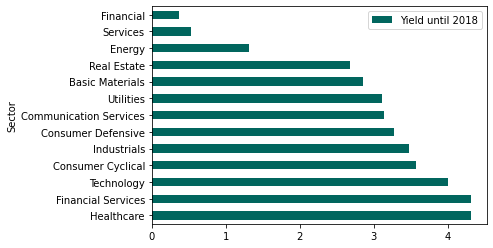

In [21]:
fig = plt.figure(figsize=(10,10))
sector.plot.barh(y='Yield until 2018', color='#01665e')

In [22]:
# The top 3 sectors that led in return the last decade were: Technology, Financial Services, and Healthcare